# Aprendizaje Supervisado - LDA & QDA

LDA & QDA son dos clasificadores que se obtiene al ajustar la probabilidad condicional de cada clase a una distribución Gaussiana, con una media y una matriz de covarianzas, ambas calculadas a partir de los datos de entrenamiento. Para el caso del clasificador LDA se asume que la matriz de covarianzas es igual para todas las clases, mientras que QDA usa una matriz de covarianza diferente para cada clase.

![Clasificador LDA](imagenes/lda.png)

LDA es uno de los clasificadores obtenidos a partir del teorema de Bayes, asumiendo distribuciones Gaussianas:

![PDF_Gaussiana](imagenes/Gauss_1.png)

Aplicando el logaritmo (que es una función monótona creciente) las funciones discriminantes toman la forma:

![Discriminante](imagenes/Gauss_2.png)

Aplicando el logaritmo sobre la distribución gaussiana tenemos:

![Discriminante](imagenes/Gauss_3.png)

Veamos como usar estos clasificadores.



In [1]:
%matplotlib inline

import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sns #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos
from sklearn import datasets #Conjuntos de datos predefinidos en sklearn
from sklearn import preprocessing #Nos ayuda a convertir características categóricas a numéricas
from sklearn import discriminant_analysis  # LDA & QDA

## 1. Clasificando el Dataset Iris

Volvamos al ejemplo de clasificación de lirios.

### 1.1  Lectura del conjunto de datos

Empezamos cargando el dataset, el cual se está disponible Sklearn:

In [3]:
#Cargamos el conjunto de datos
iris = datasets.load_iris()

#Separamos la matriz de datos y el vector de etiquetas
X = iris.data
y = iris.target

# Obtenemos los nombres de las características
Xn = iris.feature_names

# Obtenemos los nombres de las clases
clases = iris.target_names

# Número de muestras y de características
n_samples, n_features = X.shape

# Visualicemos la matriz de datos y el vector
print("Número de Objetos: ", n_samples)
print("Número de Características: ", n_features)

Número de Objetos:  150
Número de Características:  4


### 1.2 Visualicemos el conjunto de datos

Como el conjunto de datos tiene poca características lo podemos visualizar todo

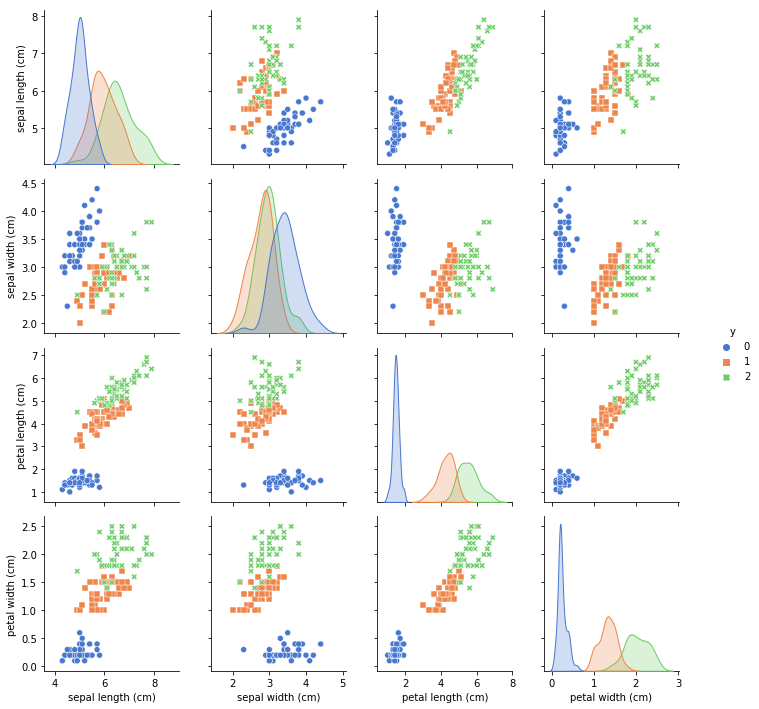

In [4]:
# Craemos el DataFrame con los datos y los nombres de las características
df = pd.DataFrame(data=X, columns=Xn)
df['y'] = y
                  
# Usamos el paquete seaborn para visualizar las características
sns.pairplot(df, diag_kind='kde', hue="y", markers=["o", "s", "X"], palette="muted")

### 1.3 Preprocesamiento de los datos

Procedemos a particionar el conjunto usando el 70% de los datos para entrenamiento y 30% para probar el modelo que se genera. Además, normalizamos los datos usando el conjunto de entrenamiento.

In [5]:
#Dividimos el conjunto de datos en 2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

### 1.4. Entrenamos los modelos



In [6]:
#Especificamos los modelos a usar LDA y QDA
lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

# Entrenamos los modelos
lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

### 1.5. Medimos la precisión de los modelos en el conjunto de test

Precisión del clasificador LDA: 97.78 


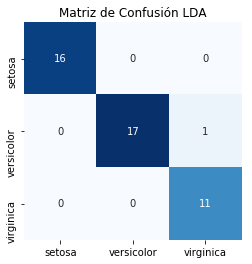



Precisión del clasificador QDA: 97.78 


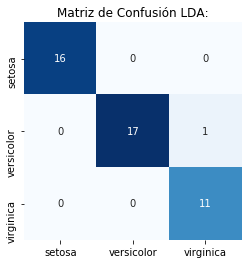

In [7]:
#Predecimos la clase del conjunto de test
y_pred_lda = lda.predict(X_test)
acc_lda = metrics.accuracy_score(y_test, y_pred_lda)
mat_lda = metrics.confusion_matrix(y_test, y_pred_lda)

y_pred_qda = qda.predict(X_test)
acc_qda = metrics.accuracy_score(y_test, y_pred_qda)
mat_qda = metrics.confusion_matrix(y_test, y_pred_qda)

print ("Precisión del clasificador LDA: %.2f " %(acc_lda*100.0) )
ax1 = plt.axes()
sns.heatmap(mat_lda, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", xticklabels=clases, yticklabels=clases, ax = ax1)
ax1.set_title('Matriz de Confusión LDA')
plt.show()

print ("\n\nPrecisión del clasificador QDA: %.2f " %(acc_qda*100.0) )
ax2 = plt.axes()
sns.heatmap(mat_qda, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", xticklabels=clases, yticklabels=clases, ax = ax2)
ax2.set_title('Matriz de Confusión LDA:')
plt.show()


## 1.6. Visualicemos las fronteras de decisión

Pero esto solo lo podemos hacer con 2 características, entonces usamos solo las 2 mejores

In [8]:
from matplotlib.colors import ListedColormap

def visualizar_clasificador(clf, X, y):
    # Grafiquemos las superficies de decisión
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=30)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Superficies de decisión")

    plt.show()

In [9]:
#Preprocesamos los datos, de nuevo ...
#Seleccionamos las 2 últimas características
X2 = iris.data[:,[2,3]]

#Dividimos el conjunto de datos en 2
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X2, y, test_size=0.3, random_state=0)

#Entrenamos
#Especificamos los modelos a usar LDA y QDA
lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

# Entrenamos los modelos
lda.fit(X_train2, y_train2)
qda.fit(X_train2, y_train2)

QuadraticDiscriminantAnalysis()

Precisión del clasificador LDA: 95.56 


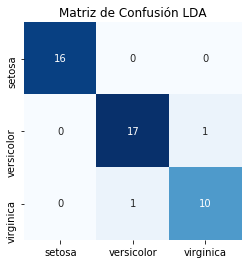



Precisión del clasificador QDA: 100.00 


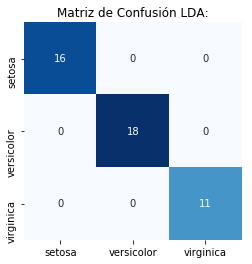

In [10]:
#Predecimos la clase del conjunto de test
y_pred_lda = lda.predict(X_test2)
acc_lda = metrics.accuracy_score(y_test2, y_pred_lda)
mat_lda = metrics.confusion_matrix(y_test2, y_pred_lda)

y_pred_qda = qda.predict(X_test2)
acc_qda = metrics.accuracy_score(y_test2, y_pred_qda)
mat_qda = metrics.confusion_matrix(y_test2, y_pred_qda)

print ("Precisión del clasificador LDA: %.2f " %(acc_lda*100.0) )
ax1 = plt.axes()
sns.heatmap(mat_lda, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", xticklabels=clases, yticklabels=clases, ax = ax1)
ax1.set_title('Matriz de Confusión LDA')
plt.show()

print ("\n\nPrecisión del clasificador QDA: %.2f " %(acc_qda*100.0) )
ax2 = plt.axes()
sns.heatmap(mat_qda, square=True, annot=True, fmt="d", cbar=False, cmap="Blues", xticklabels=clases, yticklabels=clases, ax = ax2)
ax2.set_title('Matriz de Confusión LDA:')
plt.show()

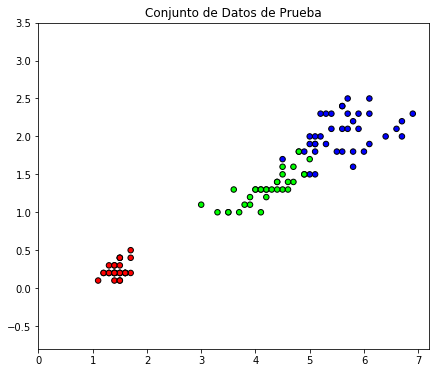

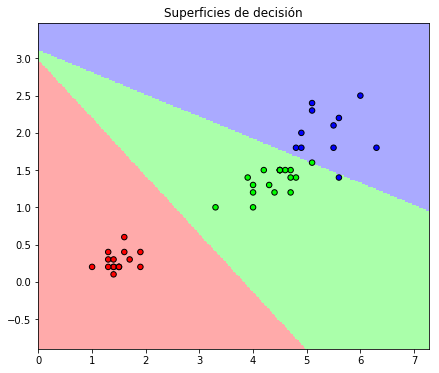

In [11]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(7,6))
ax = plt.gca()
ax.set_xlim([0,7.2])
ax.set_ylim([-0.8,3.5])
ax.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2, cmap=cmap_bold, edgecolor='k', s=30)
ax.set_title('Conjunto de Datos de Prueba')
plt.show()

#Clasificador LDA
visualizar_clasificador(lda, X_test2, y_test2)

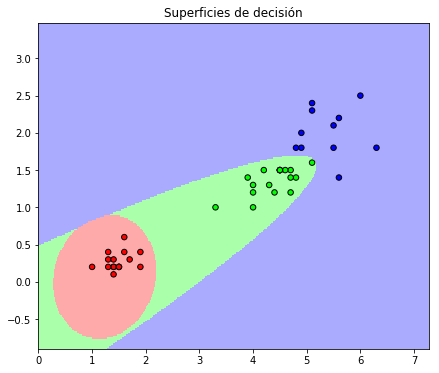

In [12]:
#Clasificador QDA
visualizar_clasificador(qda, X_test2, y_test2)